### Access libraries that will be used

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [5]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv('P:\MicrosoftOfficeDocuments\Magic_20192020_Season.csv')
magic.head()

,LogID,First_name,Last_name,Age,Pos,Tm,at,Opp,WL,Date,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
0,630,Nikola,Vucevic,29-024,C,ORL,NaN,WAS,W,11/17/2019,...,10,17,6,0,1,3,3,30,33.2,18.4
1,545,Aaron,Gordon,24-079,F,ORL,NaN,PHO,W,12/4/2019,...,5,5,5,1,0,1,1,32,30.9,19.7
2,164,Aaron,Gordon,24-163,F,ORL,@,ATL,W,2/26/2020,...,7,10,6,1,3,1,0,25,29.3,12.1
3,192,Aaron,Gordon,24-149,F,ORL,NaN,DET,W,2/12/2020,...,5,9,9,1,1,1,0,25,29.0,11.5
4,205,Nikola,Vucevic,29-109,C,ORL,NaN,ATL,W,2/10/2020,...,7,9,9,0,1,0,1,24,27.2,14.9


In [6]:
magic.tail()

,LogID,First_name,Last_name,Age,Pos,Tm,at,Opp,WL,Date,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
749,643,Mohamed,Bamba,21-185,C,ORL,NaN,PHI,W,11/13/2019,...,2,2,0,0,0,1,4,0,-2.7,-13.9
750,550,Josh,Magette,30-006,G,ORL,NaN,PHO,W,12/4/2019,...,1,1,0,0,0,3,0,1,-2.8,-78.9
751,694,Mohamed,Bamba,21-174,C,ORL,NaN,DEN,L,11/2/2019,...,5,6,0,0,1,2,6,1,-3.0,-28.2
752,38,Terrence,Ross,29-184,F-G,ORL,@,PHI,L,8/7/2020,...,3,3,2,2,1,0,4,0,-3.6,-13.3
753,723,Terrence,Ross,28-267,F-G,ORL,NaN,NYK,W,10/30/2019,...,0,1,2,0,0,0,4,2,-4.1,-22.0


### Display data using histogram, swarmplot, and boxplot

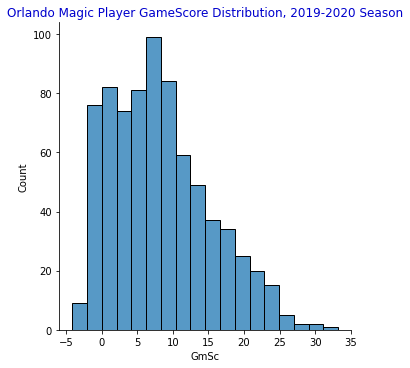

In [7]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2019-2020 Season", color='mediumblue')
plt.show()

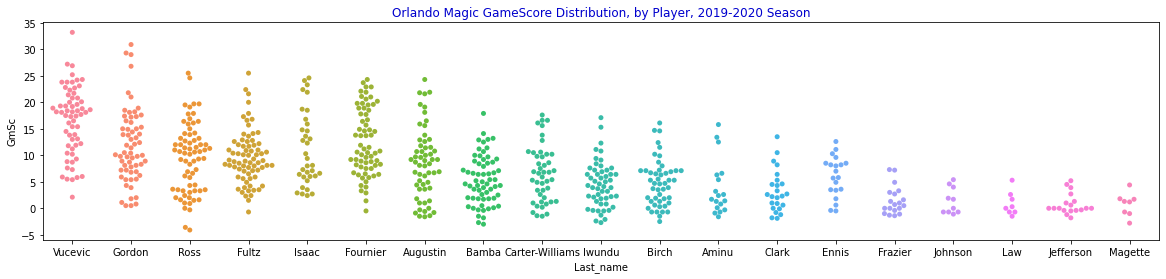

In [8]:
fig, ax = plt.subplots(figsize=(20,4))
sns.swarmplot(x="Last_name", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2019-2020 Season", color='mediumblue')
plt.show()

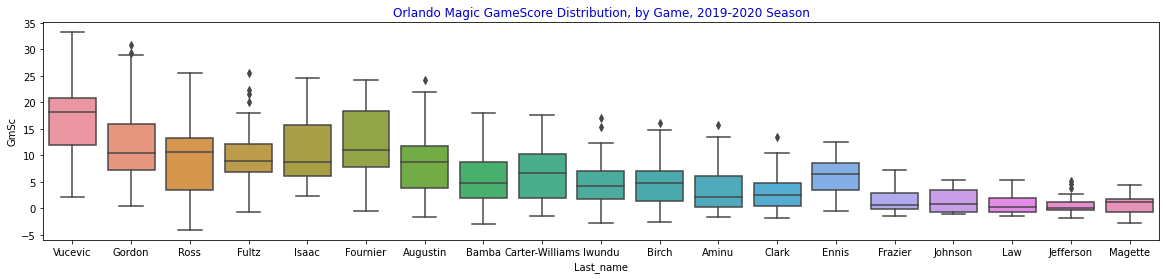

In [9]:
fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(x="Last_name", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2019-2020 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


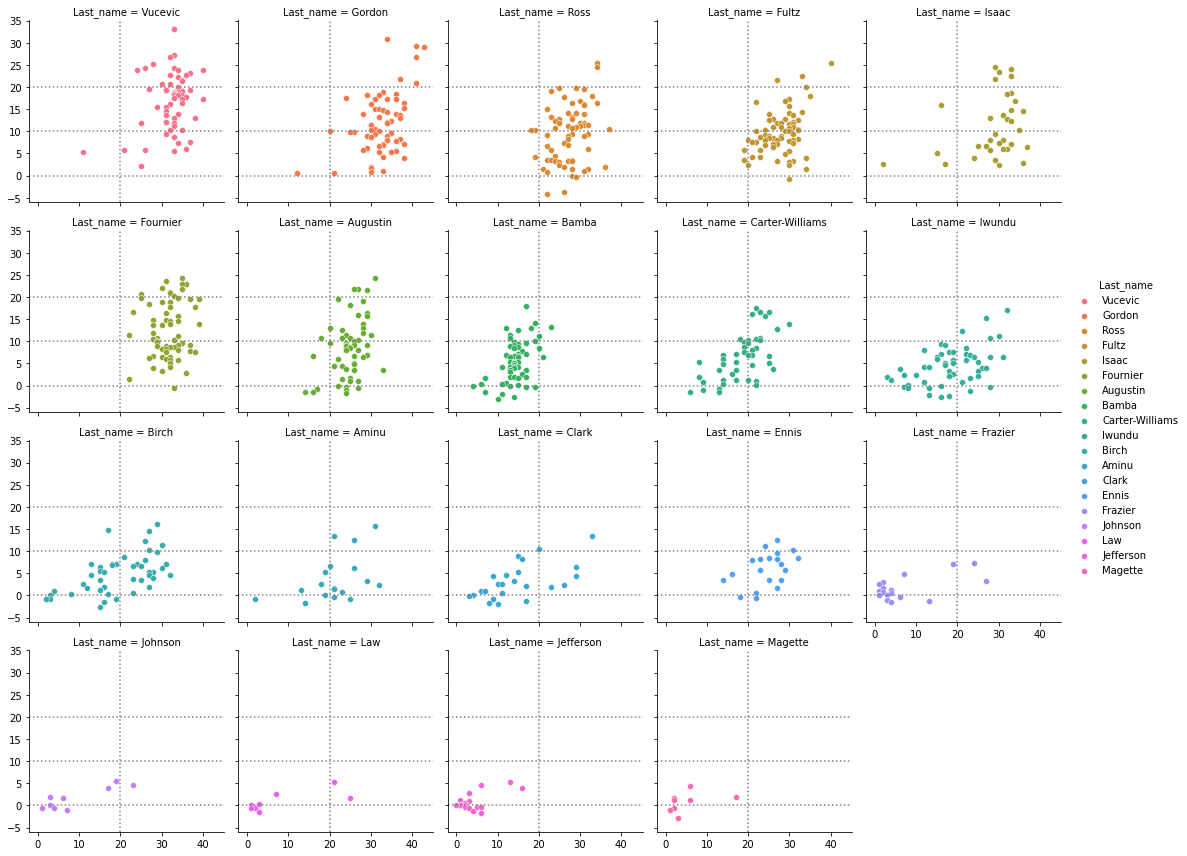

In [10]:
grid = sns.FacetGrid(magic, col = 'Last_name', hue = 'Last_name', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


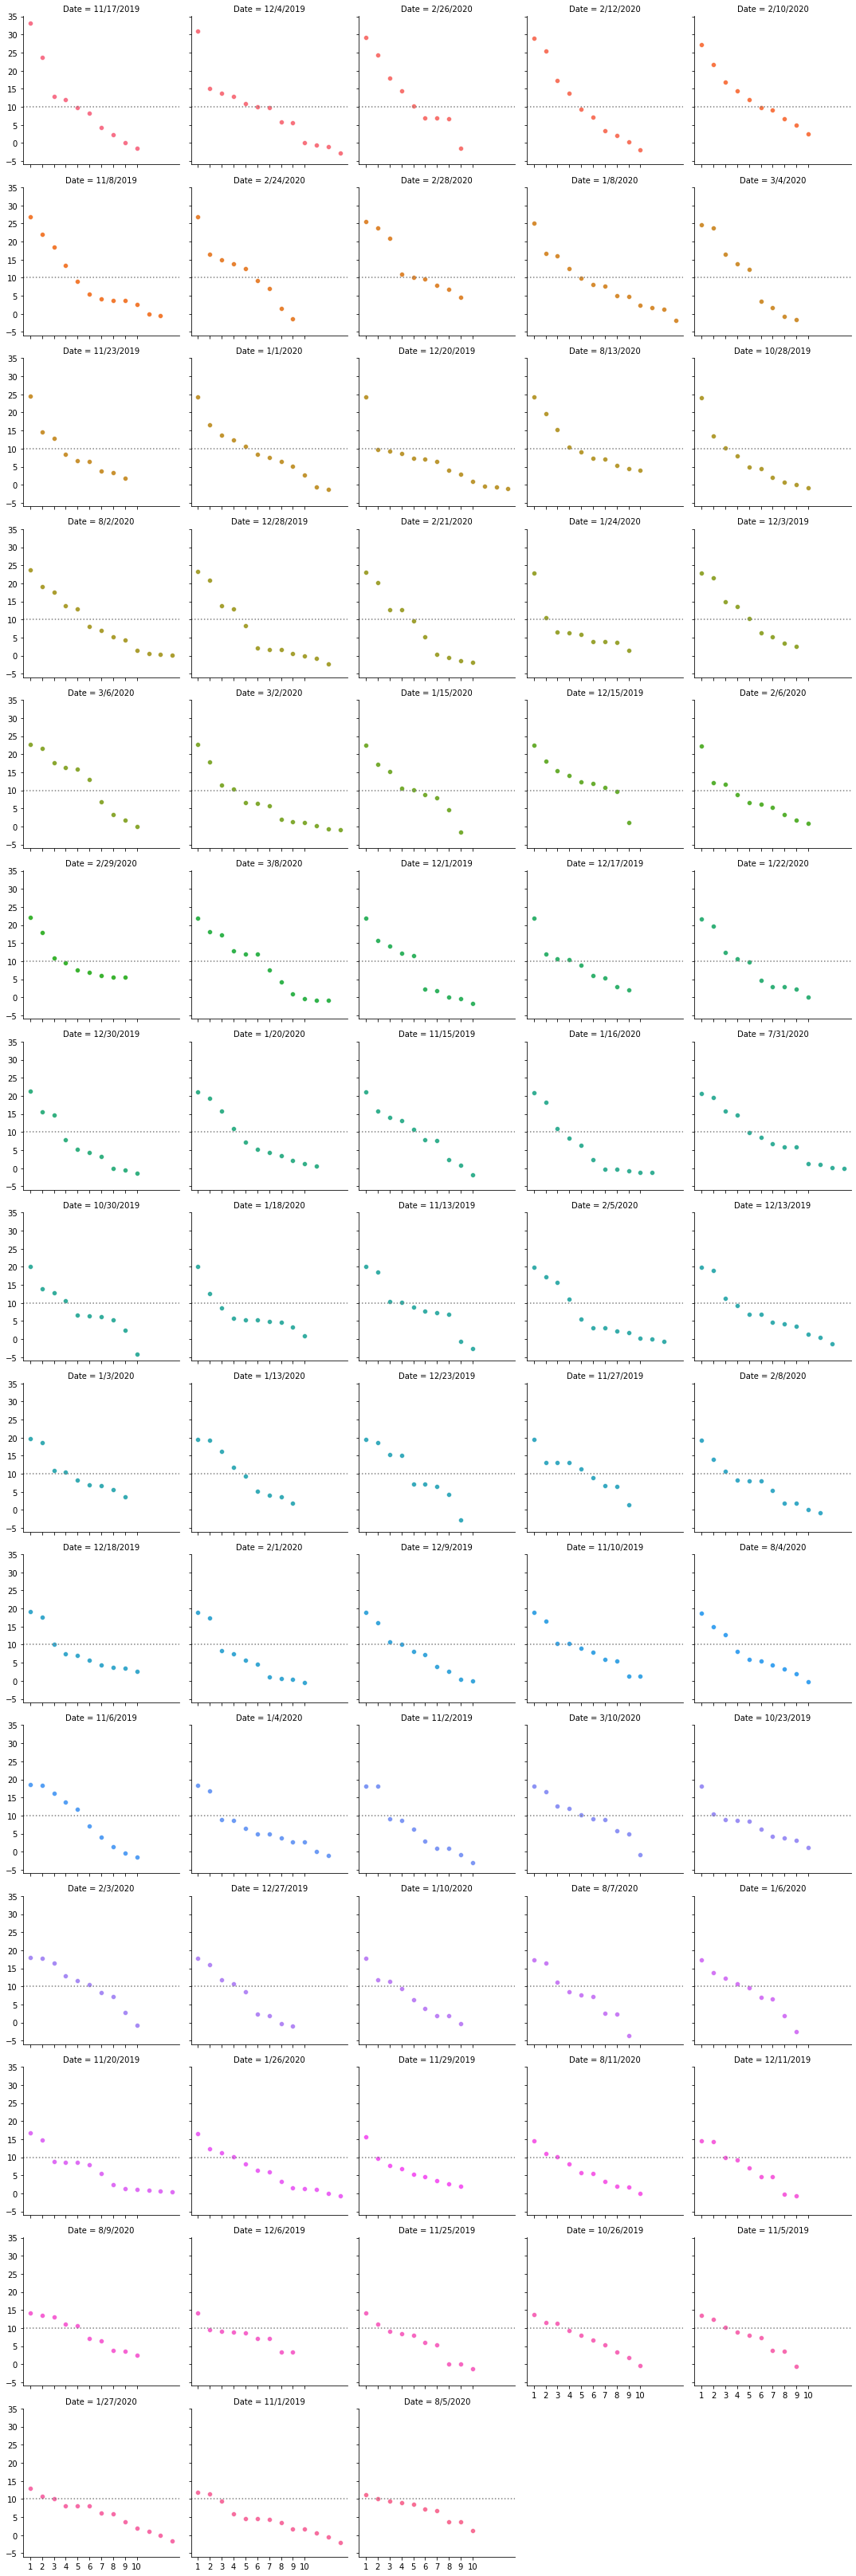

In [11]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'Last_name', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [12]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['Last_name','GmSc']].\
groupby(['Last_name'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
Last_name                                                                   
Aminu            18.0   3.888889  5.199196 -1.6   0.275   2.05   6.075  15.8
Augustin         57.0   8.607018  6.649029 -1.6   3.800   8.70  11.800  24.3
Bamba            62.0   5.377419  4.596129 -3.0   1.900   4.80   8.650  17.9
Birch            48.0   4.858333  4.438125 -2.5   1.300   4.70   7.100  16.1
Carter-Williams  45.0   6.564444  5.307163 -1.5   2.000   6.60  10.200  17.6
Clark            24.0   3.250000  3.981370 -1.9   0.450   2.45   4.775  13.5
Ennis            20.0   6.020000  3.827271 -0.5   3.475   6.40   8.500  12.6
Fournier         66.0  12.503030  6.282453 -0.5   7.875  11.00  18.325  24.3
Frazier          19.0   1.489474  2.647618 -1.4  -0.200   0.70   2.850   7.3
Fultz            72.0   9.666667  5.027810 -0.7   6.875   8.95  12.050  25.5
Gordon           62.0  11.856452  6.988319  0.5   7.200  10.45  15.975  30.9
Isaac            34.0  11.138235  6.903798  2.4   6.025   8.75  15.625  24.6
Iwundu           52.0   4.521154  4.312969 -2.7   1.675   4.20   6.975  17.1
Jefferson        18.0   0.811111  1.975404 -1.8  -0.375   0.00   1.225   5.2
Johnson          10.0   1.440000  2.466757 -1.1  -0.700   0.85   3.475   5.4
Law               8.0   0.875000  2.233991 -1.5  -0.700   0.15   1.925   5.3
Magette           8.0   0.737500  2.190849 -2.8  -0.775   1.25   1.725   4.4
Ross             69.0   9.547826  6.487173 -4.1   3.500  10.60  13.200  25.5
Vucevic          62.0  16.659677  6.440050  2.1  11.975  18.10  20.800  33.2

In [13]:
print ("\033[1m"+(colored("Sum of GameScores, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','Last_name']].groupby(['Last_name'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Sum of GameScores, by Player
                   GmSc
Last_name              
Vucevic          1032.9
Fournier          825.2
Gordon            735.1
Fultz             696.0
Ross              658.8
Augustin          490.6
Isaac             378.7
Bamba             333.4
Carter-Williams   295.4
Iwundu            235.1
Birch             233.2
Ennis             120.4
Clark              78.0
Aminu              70.0
Frazier            28.3
Jefferson          14.6
Johnson            14.4
Law                 7.0
Magette             5.9


In [14]:
magic.describe()

,LogID,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,BPM
count,754.000000,754.000000,754.000000,754.000000,754.000000,723.000000,754.000000,754.000000,696.000000,754.000000,...,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,377.500000,0.484085,23.320955,3.807692,8.578249,0.424206,2.737401,5.456233,0.485119,1.070292,...,3.312997,4.309019,2.316976,0.794430,0.525199,1.179045,1.771883,10.385942,8.293103,-1.438594
std,217.805341,0.500078,9.626927,2.968430,5.518998,0.221017,2.387997,3.980873,0.269935,1.347505,...,2.811505,3.508101,2.320657,1.001418,0.903013,1.203596,1.421129,7.702183,6.886159,12.355026
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.100000,-78.900000
25%,189.250000,0.000000,17.000000,1.000000,4.000000,0.308000,1.000000,2.000000,0.333000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.700000,-6.900000
50%,377.500000,0.000000,25.000000,3.000000,8.000000,0.438000,2.000000,5.000000,0.500000,1.000000,...,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7.200000,-1.300000
75%,565.750000,1.000000,31.000000,6.000000,13.000000,0.545000,4.000000,8.000000,0.667000,2.000000,...,5.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,12.500000,4.900000
max,754.000000,1.000000,43.000000,13.000000,27.000000,1.000000,12.000000,20.000000,1.000000,8.000000,...,19.000000,24.000000,14.000000,7.000000,6.000000,7.000000,6.000000,35.000000,33.200000,147.800000
